###  Introducción a las Series de Tiempo y la Importancia del Forecasting

Las series de tiempo son secuencias de datos recolectados en intervalos de tiempo regulares, donde cada punto de datos está asociado con un instante o período específico. Estas series permiten analizar cómo evolucionan las variables en el tiempo, capturando tendencias, patrones estacionales y fluctuaciones irregulares. El *forecasting* o pronóstico en series de tiempo es crucial para anticipar cambios futuros basados en datos históricos, proporcionando información valiosa para la toma de decisiones estratégicas.

En términos formales, una serie de tiempo puede representarse como $ \{y_t\} $, donde $ y_t $ es el valor de la variable en el tiempo $ t $. Un modelo de pronóstico, como ARIMA o XGBoost, intenta predecir los valores futuros $ y_{t+h} $ (donde $ h $ es el horizonte de predicción) utilizando datos históricos $ y_1, y_2, \ldots, y_t $ y, opcionalmente, otras variables predictoras.

### Ejemplo Práctico Conceptual

Imaginemos una empresa que gestiona el inventario de un producto. El objetivo es predecir la demanda futura para optimizar la cantidad de stock y evitar tanto la escasez como el exceso. La serie de tiempo de la demanda diaria $ \{d_t\} $ contiene valores históricos de unidades vendidas cada día.

En un escenario de pronóstico univariado, se utilizan los datos pasados de $ d_t $ para predecir los valores futuros. Aquí, el modelo ARIMA podría capturar las tendencias estacionales y las fluctuaciones diarias, generando predicciones basadas únicamente en la demanda histórica.

Aquí tienes la traducción del texto con los términos técnicos adecuados:

### Componentes de una Serie Temporal

- **Tendencia** - La tendencia muestra una dirección general de los datos de la serie temporal durante un largo período. Una tendencia puede ser creciente (ascendente), decreciente (descendente) o horizontal (estacionaria).

- **Estacionalidad** - El componente de estacionalidad exhibe una tendencia que se repite en cuanto a tiempo, dirección y magnitud. Algunos ejemplos incluyen un aumento en el consumo de agua en verano debido a las condiciones climáticas cálidas.

- **Componente Cíclico** - Estas son las tendencias sin repetición establecida durante un período de tiempo particular. Un ciclo se refiere al período de altibajos, auges y caídas de una serie temporal, observados principalmente en ciclos económicos. Estos ciclos no muestran una variación estacional pero generalmente ocurren durante un período de 3 a 12 años dependiendo de la naturaleza de la serie temporal.

- **Variación Irregular** - Estas son las fluctuaciones en los datos de la serie temporal que se hacen evidentes cuando se eliminan las variaciones de tendencia y cíclicas. Estas variaciones son impredecibles, erráticas y pueden ser o no aleatorias.


### Modelo ARIMA

El modelo ARIMA (Autoregressive Integrated Moving Average) es uno de los métodos más populares y versátiles para el análisis y pronóstico de series de tiempo. Se compone de tres partes principales:

1. **Autoregressive (AR)**: Esta parte del modelo representa una regresión de la variable sobre sus propios valores pasados. La notación $ AR(p) $ indica que la variable está influenciada por sus $ p $ valores anteriores. Matemáticamente, se expresa como:
   $
   y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \ldots + \phi_p y_{t-p} + \varepsilon_t
  $
   donde $ y_t $ es el valor en el tiempo $ t $, $ c $ es una constante, $ \phi_1, \ldots, \phi_p $ son los coeficientes del modelo, y $ \varepsilon_t $ es el término de error aleatorio.

2. **Integrated (I)**: Esta parte del modelo representa el orden de diferenciación necesaria para que la serie de tiempo sea estacionaria. Una serie es estacionaria si sus propiedades estadísticas, como la media y la varianza, no cambian con el tiempo. La notación $ I(d) $ indica que la serie se ha diferenciado $ d $ veces para lograr estacionariedad.

3. **Moving Average (MA)**: Esta parte del modelo representa una relación lineal entre el valor actual de la serie y los errores pasados. La notación $ MA(q) $ indica que el modelo utiliza los $ q $ términos de error anteriores. Se expresa matemáticamente como:
   $
   y_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \ldots + \theta_q \varepsilon_{t-q}
   $
   donde $ \mu $ es la media de la serie, $ \theta_1, \ldots, \theta_q $ son los coeficientes del modelo, y $ \varepsilon_t $ es el término de error aleatorio en el tiempo $ t $.


### 1. Generación de Datos Artificiales

Imaginemos que tenemos datos de inventario diario para un producto específico en una tienda. Generaremos estos datos con una tendencia estacional y un componente de ruido.

#### 1.1. Generación de Datos con una Variable Predictora


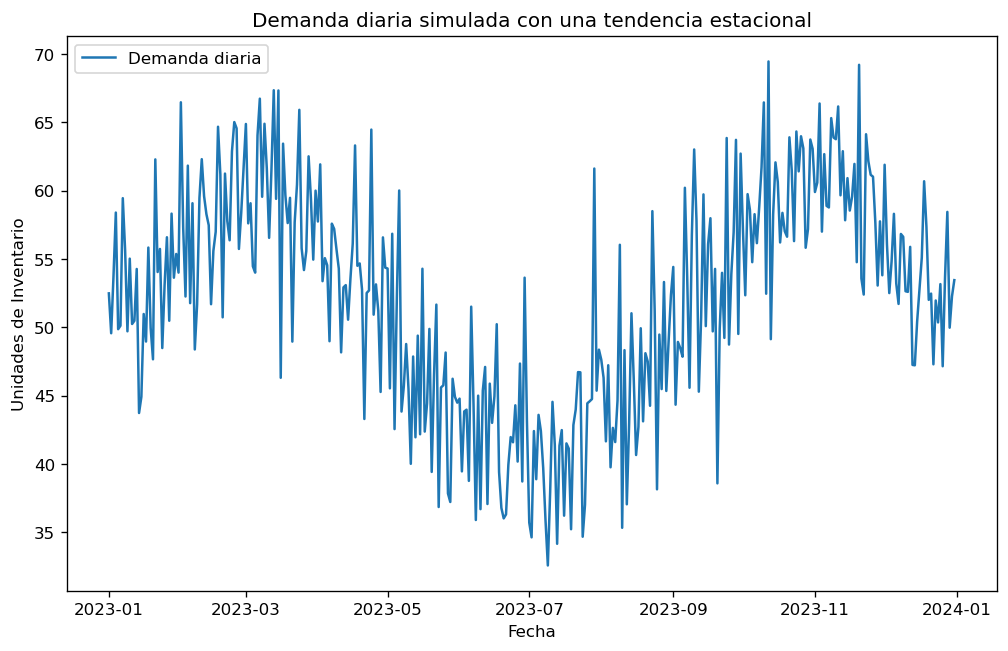

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configuración de la semilla para reproducibilidad
np.random.seed(42)

# Generar datos de fechas
dates = pd.date_range(start='2023-01-01', periods=365, freq='D')

# Generar datos de demanda con tendencia estacional
demand = 50 + 10 * np.sin(np.linspace(0, 3 * np.pi, 365)) + np.random.normal(0, 5, 365)

# Crear un DataFrame
data = pd.DataFrame({'date': dates, 'demand': demand})

# Visualizar los datos
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['demand'], label='Demanda diaria')
plt.title('Demanda diaria simulada con una tendencia estacional')
plt.xlabel('Fecha')
plt.ylabel('Unidades de Inventario')
plt.legend()
plt.show()

In [3]:
data.head()

,date,demand
0,2023-01-01,52.483571
1,2023-01-02,49.567572
2,2023-01-03,53.756056
3,2023-01-04,58.391136
4,2023-01-05,49.863072


**Descomposición ETS** - La descomposición ETS se utiliza para separar los diferentes componentes de una serie temporal. El término ETS significa Error, Trend (tendencia) y Seasonality (estacionalidad).

La descomposición de una serie temporal se puede realizar considerando la serie como una combinación aditiva o multiplicativa del nivel base, la tendencia, el índice estacional y el término residual.

La función ``seasonal_decompose`` de ``statsmodels`` implementa esto de manera conveniente.

C:\Users\16079220\AppData\Local\Temp\ipykernel_18764\3061613021.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\16079220\AppData\Local\Temp\ipykernel_18764\3061613021.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


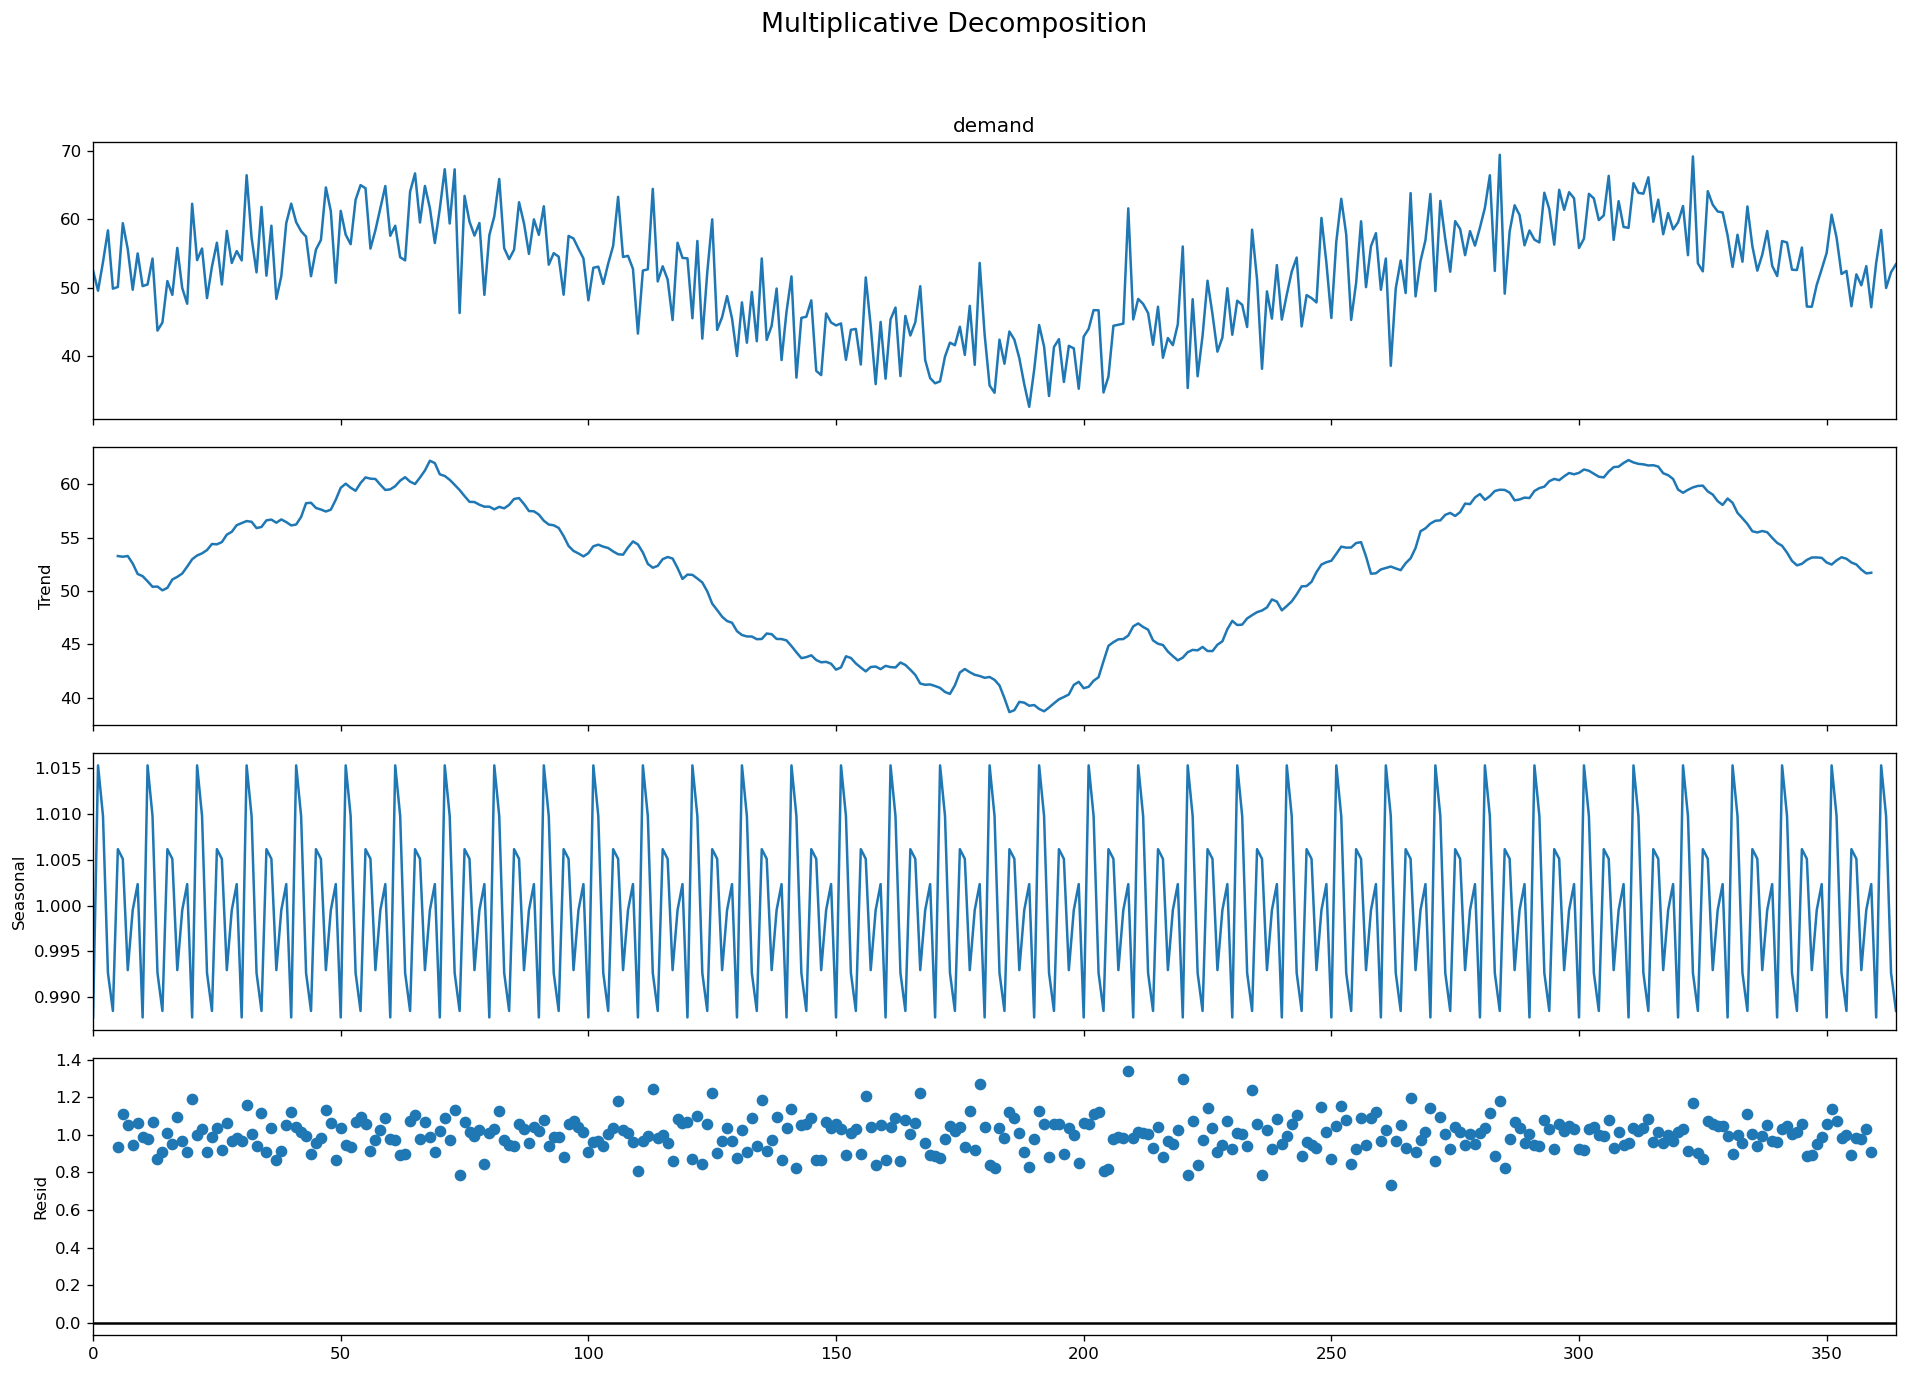

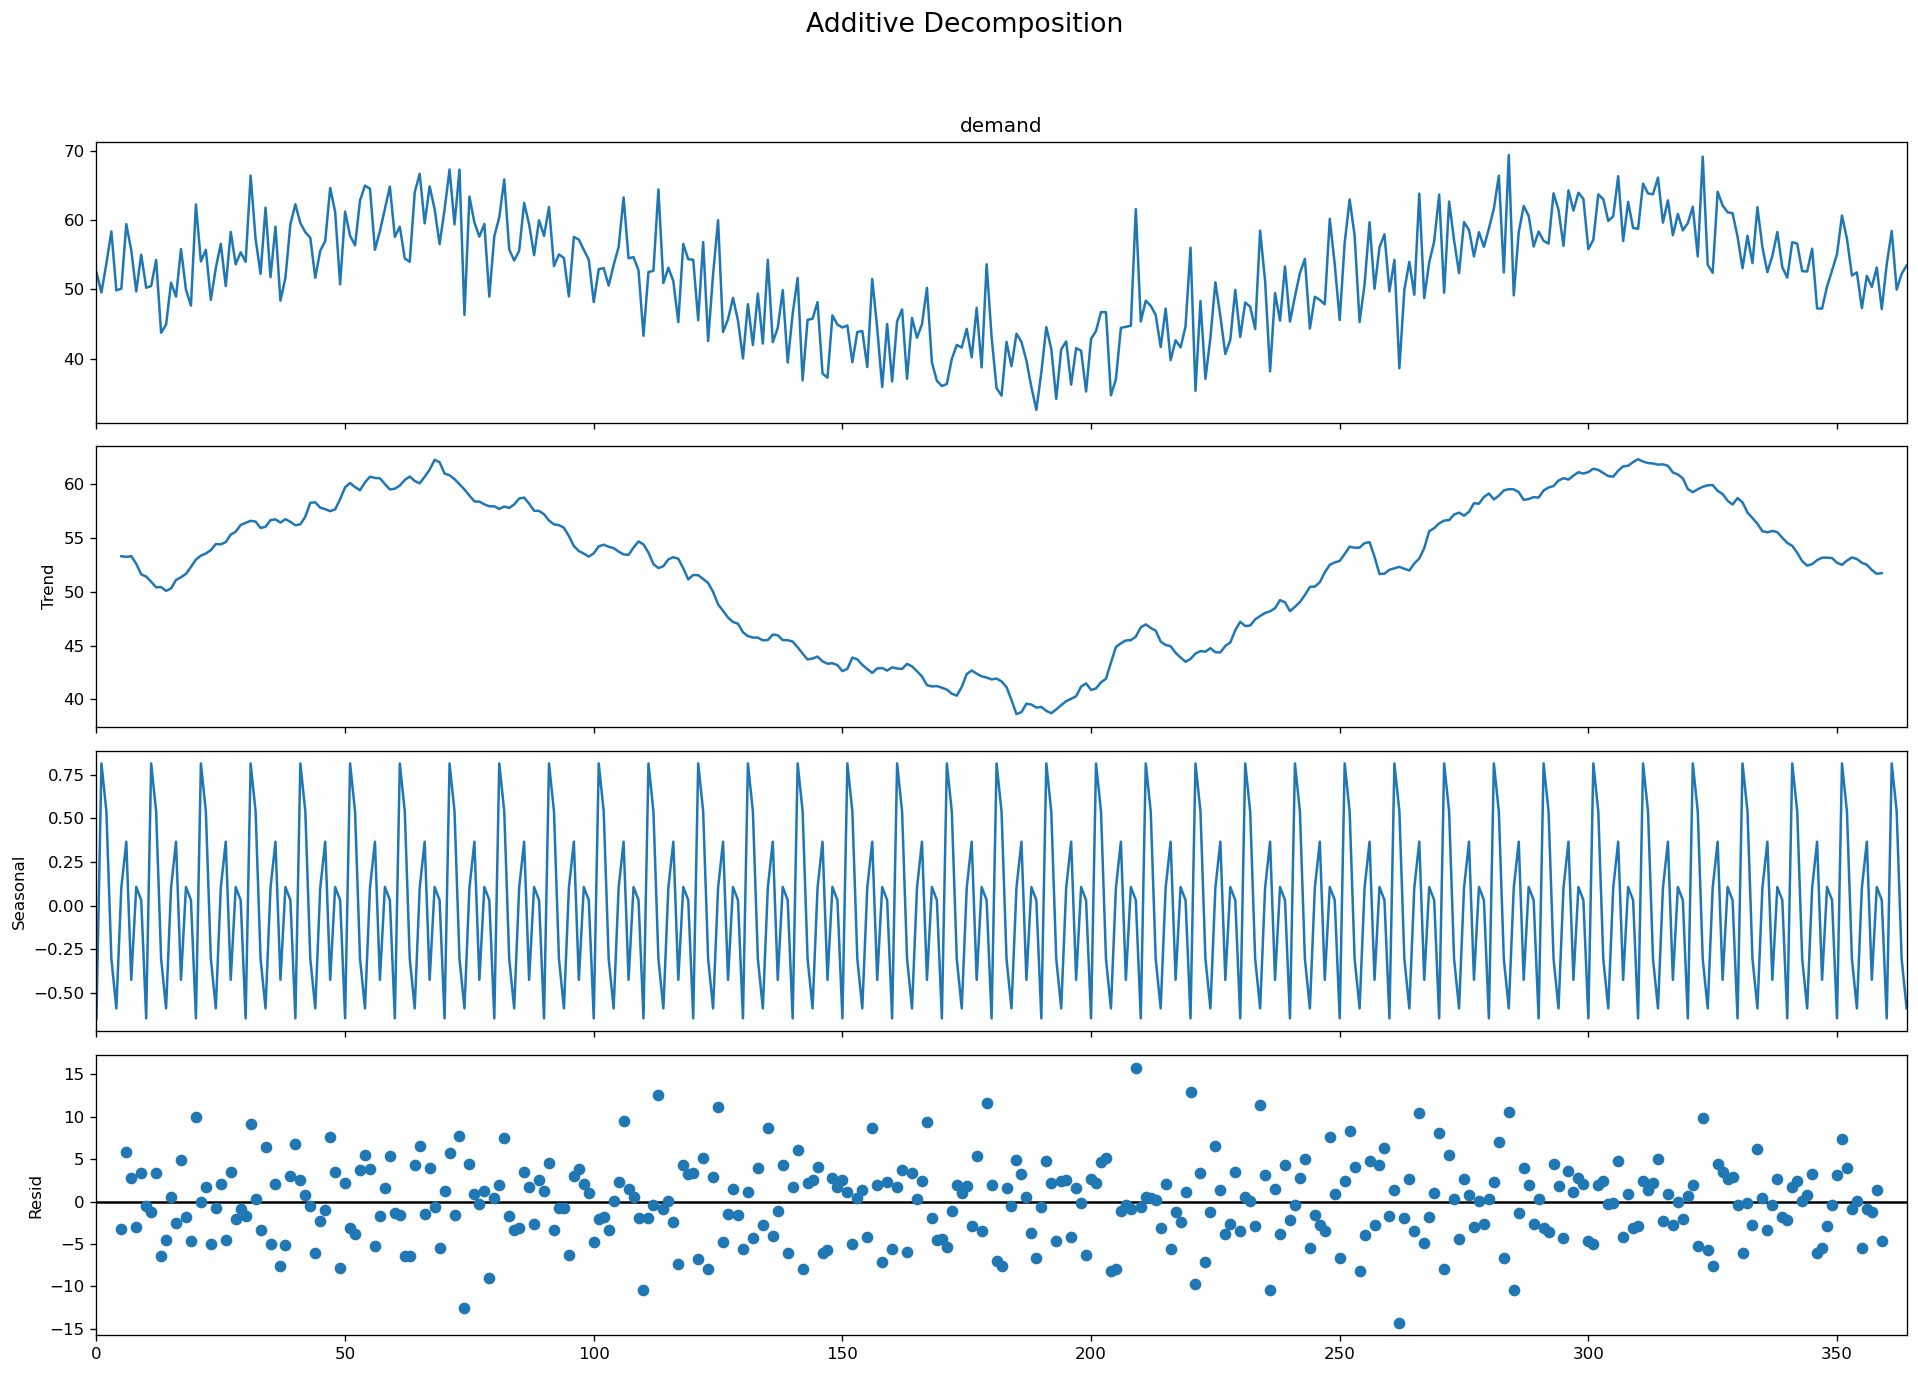

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(data['demand'], model='multiplicative', period=10)

# Additive Decomposition
additive_decomposition = seasonal_decompose(data['demand'], model='additive', period=10)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

El **ADF (Augmented Dickey-Fuller) test** es una prueba estadística que se utiliza para determinar si una serie temporal es estacionaria, es decir, si sus propiedades estadísticas (media, varianza) son constantes a lo largo del tiempo. Este test es crucial en el contexto de los modelos ARIMA (Autoregressive Integrated Moving Average), ya que estos modelos requieren que la serie temporal sea estacionaria para producir pronósticos precisos. El ADF test evalúa la presencia de una raíz unitaria en la serie, lo que indicaría no estacionariedad.

La prueba se realiza mediante la formulación de una hipótesis nula que postula la existencia de una raíz unitaria (no estacionariedad) y una hipótesis alternativa que sugiere lo contrario (estacionariedad). El resultado del ADF test produce un valor p (p-value) y un estadístico de prueba. Si el valor p es menor que un nivel de significancia preestablecido (por ejemplo, 0.05), se rechaza la hipótesis nula, lo que implica que la serie es estacionaria. Si no se rechaza la hipótesis nula, se concluye que la serie no es estacionaria y podría ser necesario aplicar transformaciones como diferenciación para lograr la estacionariedad antes de ajustar un modelo ARIMA.

In [12]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(data.demand.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.365820
p-value: 0.598548


Dado que el valor p (1,00) es mayor que el nivel de significancia (0,05), diferenciemos las series y veamos cómo se ve el gráfico de autocorrelación.

**Función de Autocorrelación:** Esta función muestra la correlación de la serie con retrasos de sí misma. Para una serie estacionaria, los valores de autocorrelación deben decaer rápidamente a cero, indicando que no hay una dependencia significativa a largo plazo.

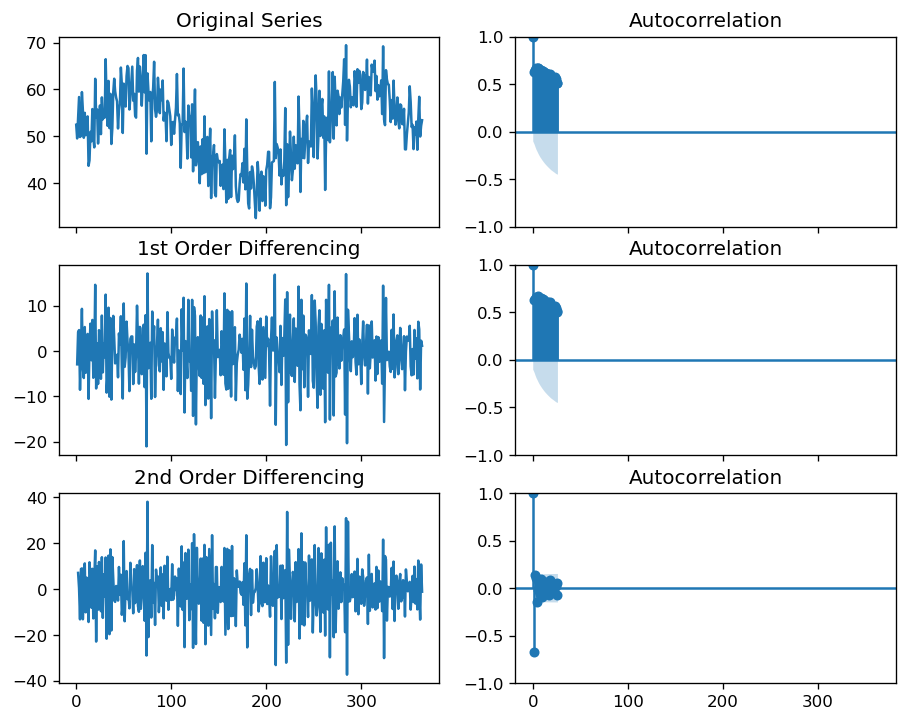

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data.demand); axes[0, 0].set_title('Original Series')
plot_acf(data.demand, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data.demand.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data.demand.dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data.demand.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data.demand.diff().diff().dropna(), ax=axes[2, 1])

plt.show()


Para los datos anteriores, podemos ver que la serie temporal alcanza la estacionariedad con dos órdenes de diferenciación.

## Cómo encontrar el orden del término AR (p) 

**Función de Autocorrelación Parcial:** Esta función muestra la correlación de la serie con sus retardos, pero ajustando el efecto de los rezagos intermedios. Para una serie estacionaria, los valores de la PACF después del primer retardo deben ser insignificantes 



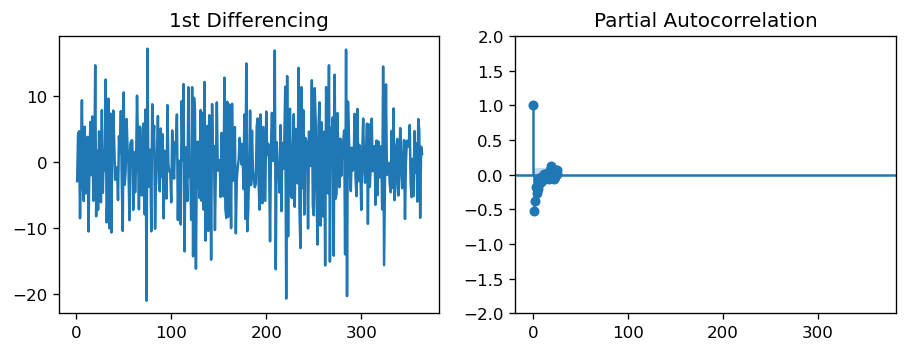

In [26]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(data.demand.diff()); axes[0].set_title('1st Differencing')

plot_pacf(data.demand.diff().dropna(), ax=axes[1])
axes[1].set(ylim=(-2,2))
plt.show()

## Cómo encontrar el orden del término MA (q)

La ACF indica cuántos términos MA se requieren para eliminar cualquier autocorrelación en la serie estacionaria.

Podemos ver CUANTOS retardos están muy por encima de la línea de significancia. Por lo tanto, con ese valor fijaremos q, por ejmplo si hay 2 retardos por encima fijamos q en 2. Si hay alguna duda, optaremos por el modelo más simple que explique suficientemente el Y.

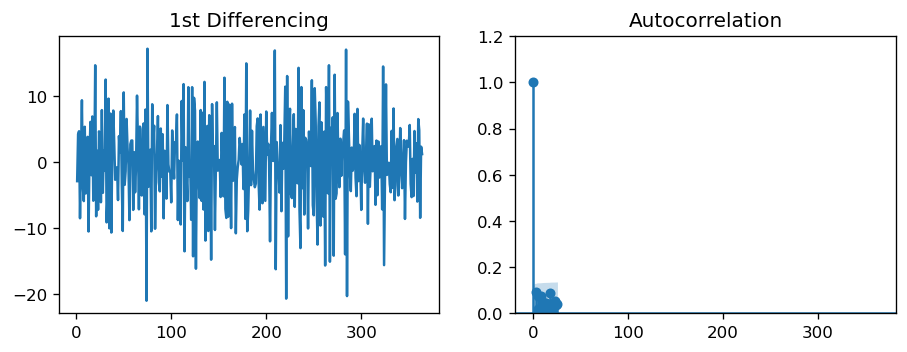

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(data.demand.diff()); axes[0].set_title('1st Differencing')

plot_acf(data.demand.diff().dropna(), ax=axes[1])
axes[1].set(ylim=(0,1.2))
plt.show()

In [37]:
data.demand.iloc[:300]

0      52.483571
1      49.567572
2      53.756056
3      58.391136
4      49.863072
         ...    
295    56.303573
296    64.318275
297    61.402344
298    63.969115
299    63.085266
Name: demand, Length: 300, dtype: float64

### 2. Predicción usando ARIMA

#### 2.1. Ajuste del Modelo ARIMA

ARIMA es adecuado para series de tiempo univariadas. Utilizaremos la columna `demand` como la única variable predictora para pronosticar la demanda futura.

In [38]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(data.demand.iloc[:300], order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 demand   No. Observations:                  300
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -915.403
Date:                Wed, 14 Aug 2024   AIC                           1838.806
Time:                        10:46:59   BIC                           1853.607
Sample:                             0   HQIC                          1844.730
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9832      0.014     68.257      0.000       0.955       1.011
ma.L1         -1.9267      0.024    -80.673      0.000      -1.973      -1.880
ma.L2          0.9338      0.024     39.699      0.0

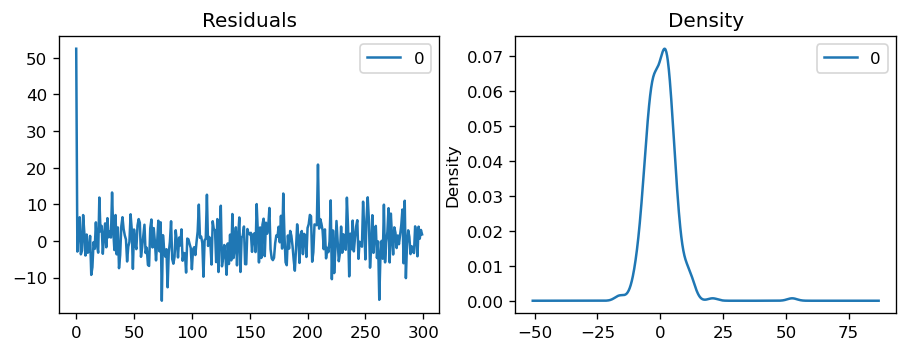

In [39]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

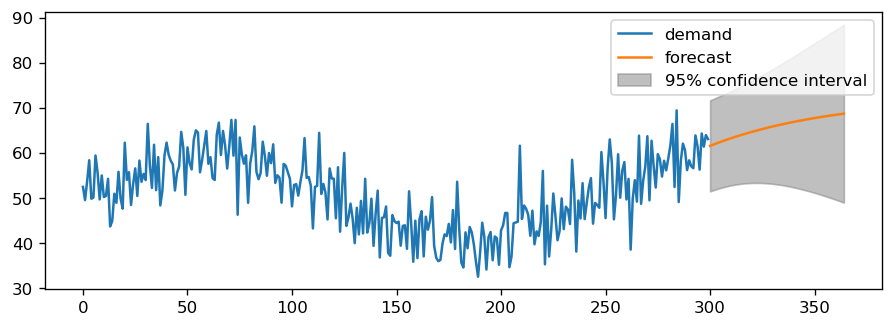

In [40]:
# Actual vs Fitted

from statsmodels.graphics.tsaplots import plot_predict
fig, ax = plt.subplots()
ax = data.demand.iloc[:300].plot(ax=ax)
plot_predict(model_fit,300, 364,ax=ax)
plt.show()


### Ejemplo con datos reales

No tenemos descripción de los datos

In [48]:
path = 'dataset.txt'

df = pd.read_csv(path)

df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [50]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 3.145186
p-value: 1.000000


Dado que el valor p (1,00) es mayor que el nivel de significancia (0,05), diferenciemos las series y veamos cómo se ve el gráfico de autocorrelación.

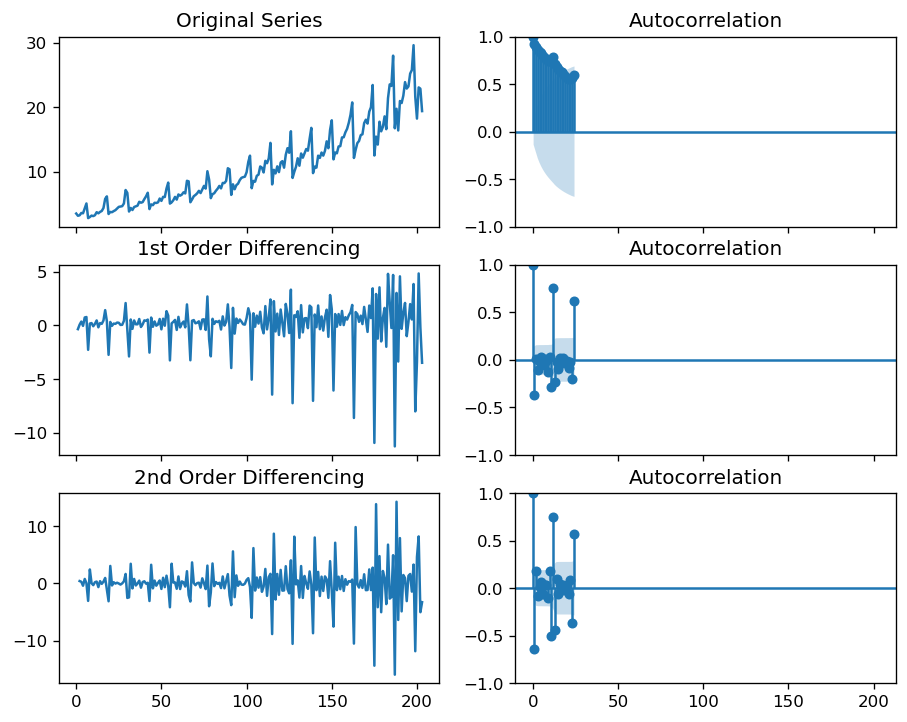

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()



Para los datos anteriores, podemos ver que la serie temporal alcanza la estacionariedad con dos órdenes de diferenciación.



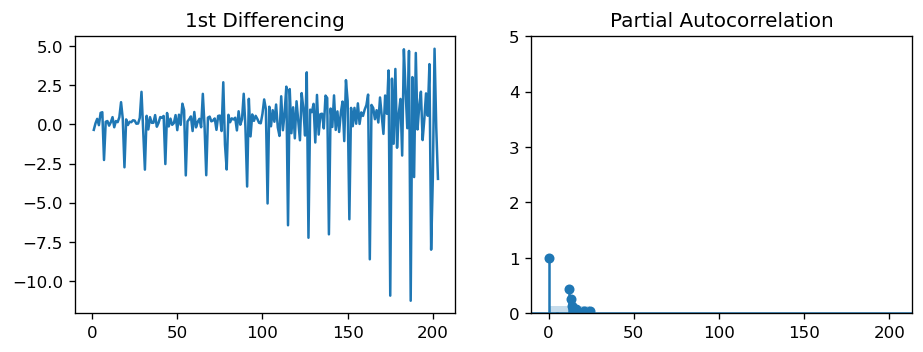

In [52]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')

plot_pacf(df.value.diff().dropna(), ax=axes[1])
axes[1].set(ylim=(0,5))
plt.show()

Podemos ver que el retardo 1 de PACF es bastante significativo, ya que se encuentra muy por encima de la línea de significancia. Por lo tanto, fijaremos el valor de p en 1.

**Función de Autocorrelación Parcial:** Esta función muestra la correlación de la serie con sus rezagos, pero ajustando el efecto de los rezagos intermedios. Para una serie estacionaria, los valores de la PACF después del primer rezago deben ser insignificantes 

Podemos ver que el retardo 1 de PACF es bastante significativo, ya que se encuentra muy por encima de la línea de significancia. Por lo tanto, fijaremos el valor de p en 1.

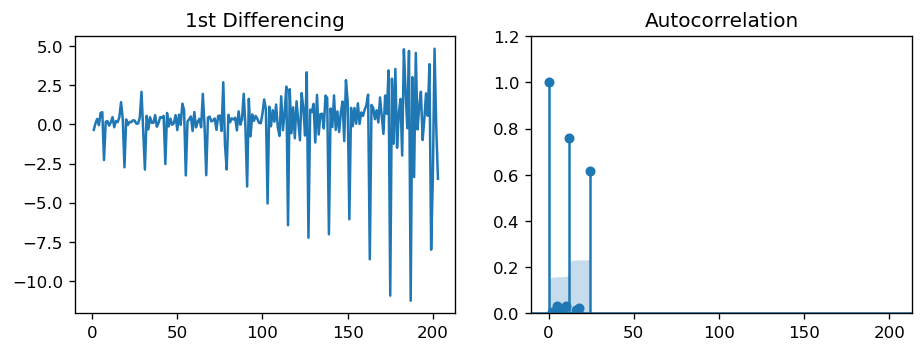

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')

plot_acf(df.value.diff().dropna(), ax=axes[1])
axes[1].set(ylim=(0,1.2))
plt.show()

La ACF indica cuántos términos MA se requieren para eliminar cualquier autocorrelación en la serie estacionaria.

Podemos ver que hay un par de rezagos muy por encima de la línea de significancia. Por lo tanto, fijaremos q en 2. Si hay alguna duda, optaremos por el modelo más simple que explique suficientemente el Y.

Ahora, hemos determinado los valores de p, d y q. Tenemos todo lo necesario para ajustar el modelo ARIMA. Usaremos la implementación ARIMA() en el paquete statsmodels.

In [59]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.value, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  204
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -424.570
Date:                Wed, 14 Aug 2024   AIC                            857.140
Time:                        11:11:08   BIC                            870.393
Sample:                             0   HQIC                           862.502
                                - 204                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4178      0.356      1.174      0.240      -0.280       1.115
ma.L1         -0.9546      0.377     -2.531      0.011      -1.694      -0.215
ma.L2          0.0969      0.272      0.356      0.7

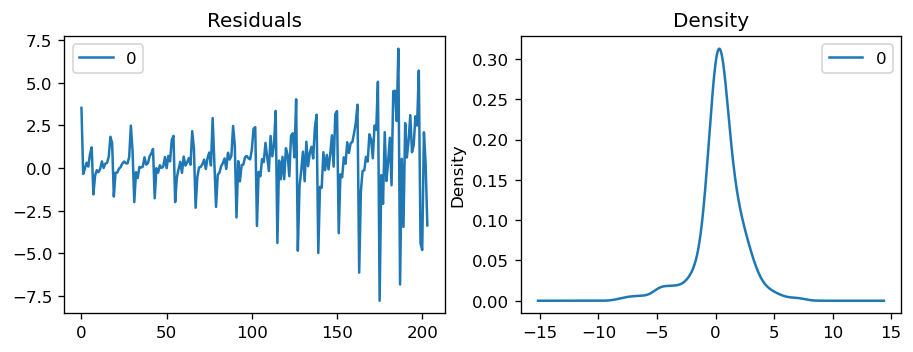

In [60]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

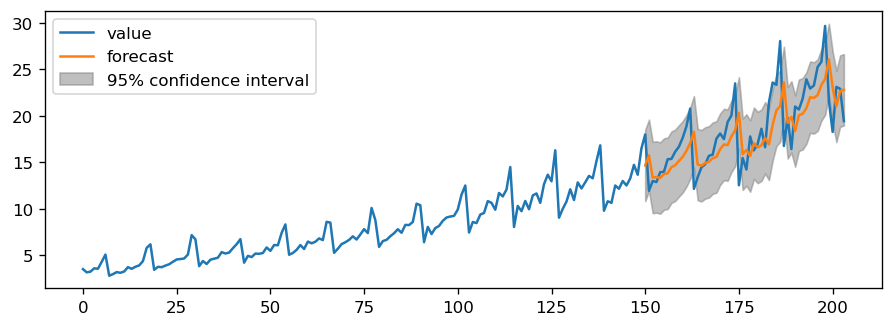

In [61]:
# Actual vs Fitted
from statsmodels.graphics.tsaplots import plot_predict
fig, ax = plt.subplots()
ax = df.iloc[0:].plot(ax=ax)
plot_predict(model_fit,150, 203,ax=ax)
plt.show()


In [62]:
# 1,1,1 ARIMA Model
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  204
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -424.762
Date:                Wed, 14 Aug 2024   AIC                            855.524
Time:                        11:11:19   BIC                            865.463
Sample:                             0   HQIC                           859.545
                                - 204                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3009      0.094      3.195      0.001       0.116       0.485
ma.L1         -0.8300      0.048    -17.204      0.000      -0.925      -0.735
sigma2         3.8327      0.259     14.790      0.0

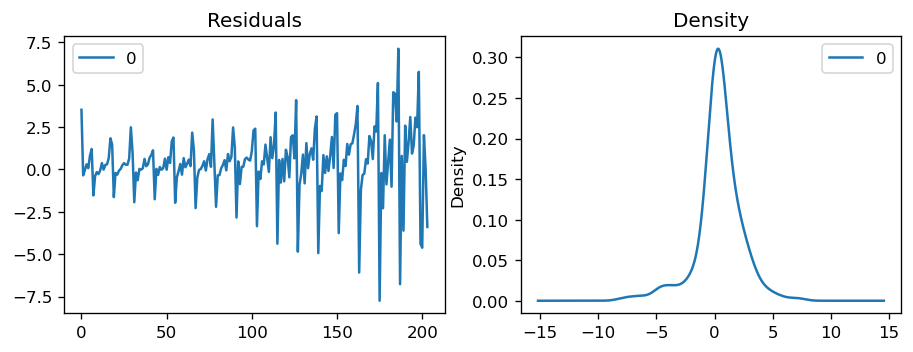

In [63]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

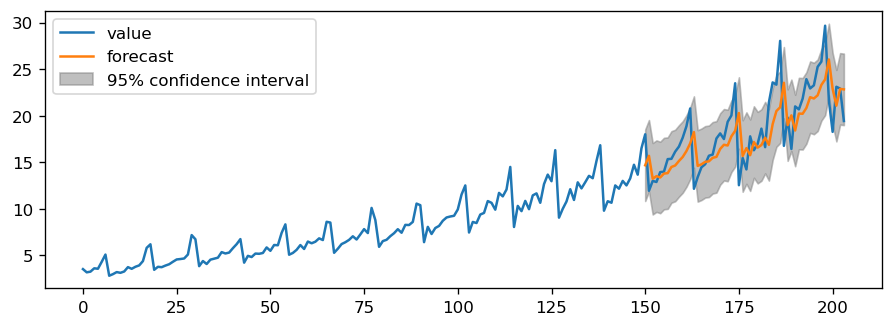

In [64]:
# Actual vs Fitted
from statsmodels.graphics.tsaplots import plot_predict
fig, ax = plt.subplots()
ax = df.iloc[0:].plot(ax=ax)
plot_predict(model_fit,150, 203,ax=ax)
plt.show()


## Ejemplo 2

In [65]:
df = pd.read_csv("monthly-beer-production-in-austr.csv")
df.Month = pd.to_datetime(df.Month)
df.head()

,Month,Monthly beer production
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9


In [66]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from pandas import concat
import numpy as np
from math import sqrt

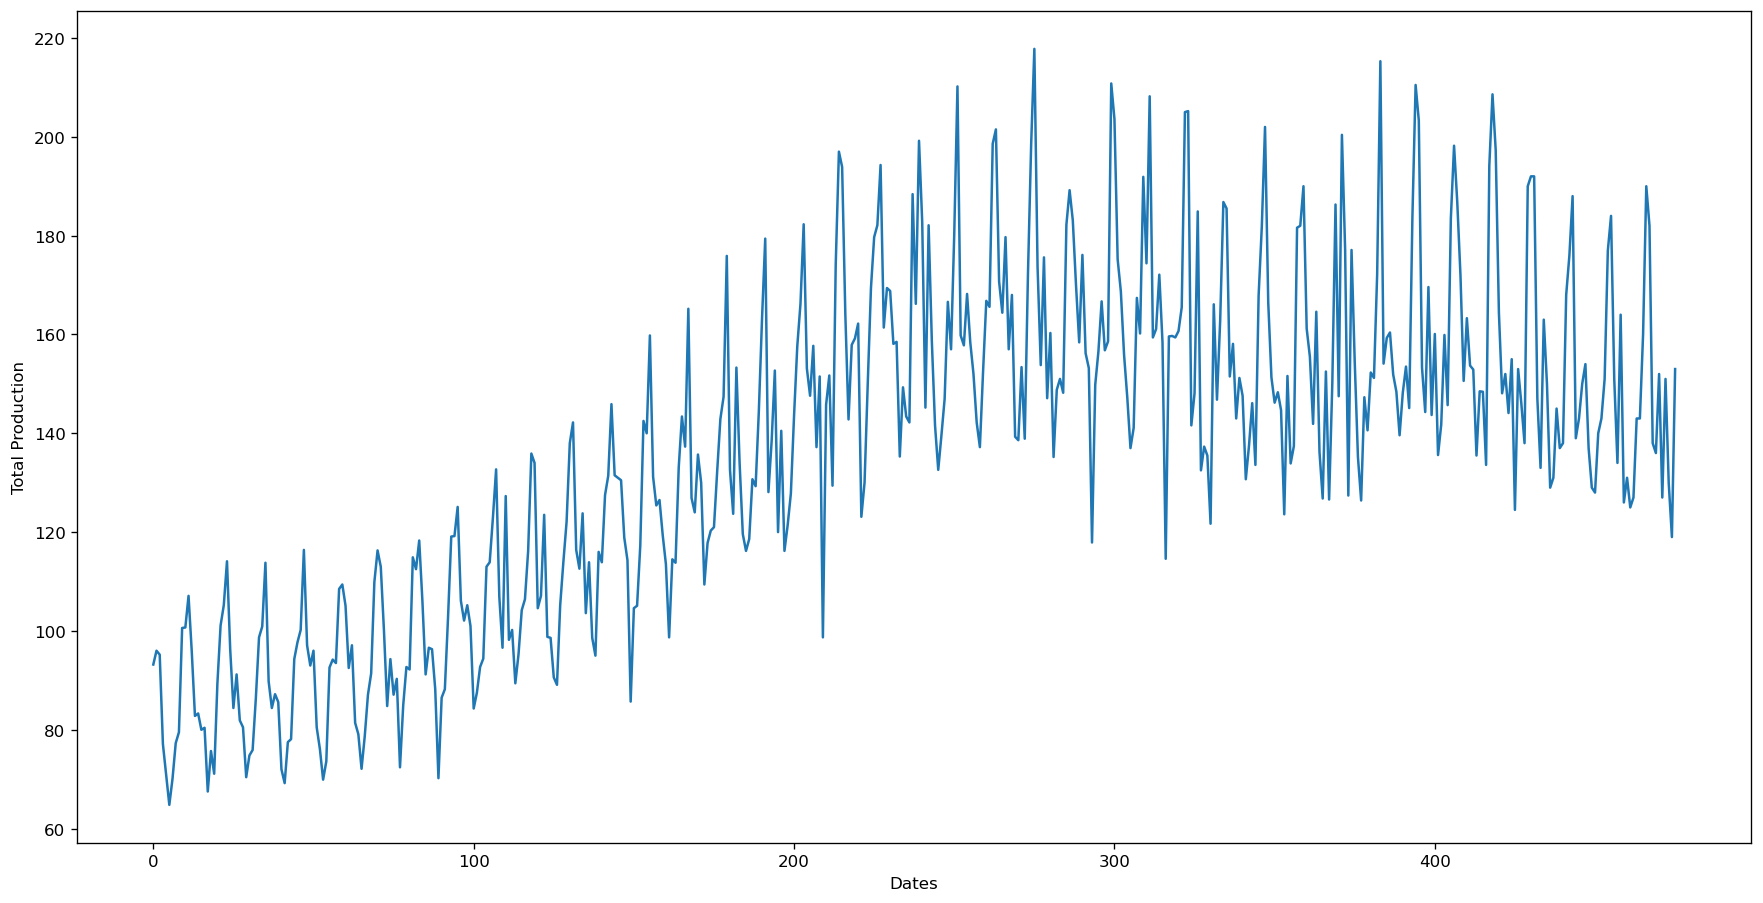

In [69]:


plt.figure(figsize=(18,9))
plt.plot(df.index, df["Monthly beer production"], linestyle="-")
plt.xlabel('Dates')
plt.ylabel('Total Production')
plt.show();



Al observar el gráfico, podemos observar que hay una tendencia ascendente a lo largo del período de tiempo. Además de esto, hay una estacionalidad en estos datos. Por lo tanto, utilizaremos SARIMA (`Seasonal ARIMA`) en lugar de ARIMA.

`Seasonal ARIMA` es una extensión de ARIMA que admite explícitamente datos de series temporales univariadas con un componente estacional. Agrega tres nuevos hiperparámetros para especificar la autorregresión (AR), la diferenciación (I) y la media móvil (MA) para el componente estacional de la serie, así como un parámetro adicional para el período de la estacionalidad.

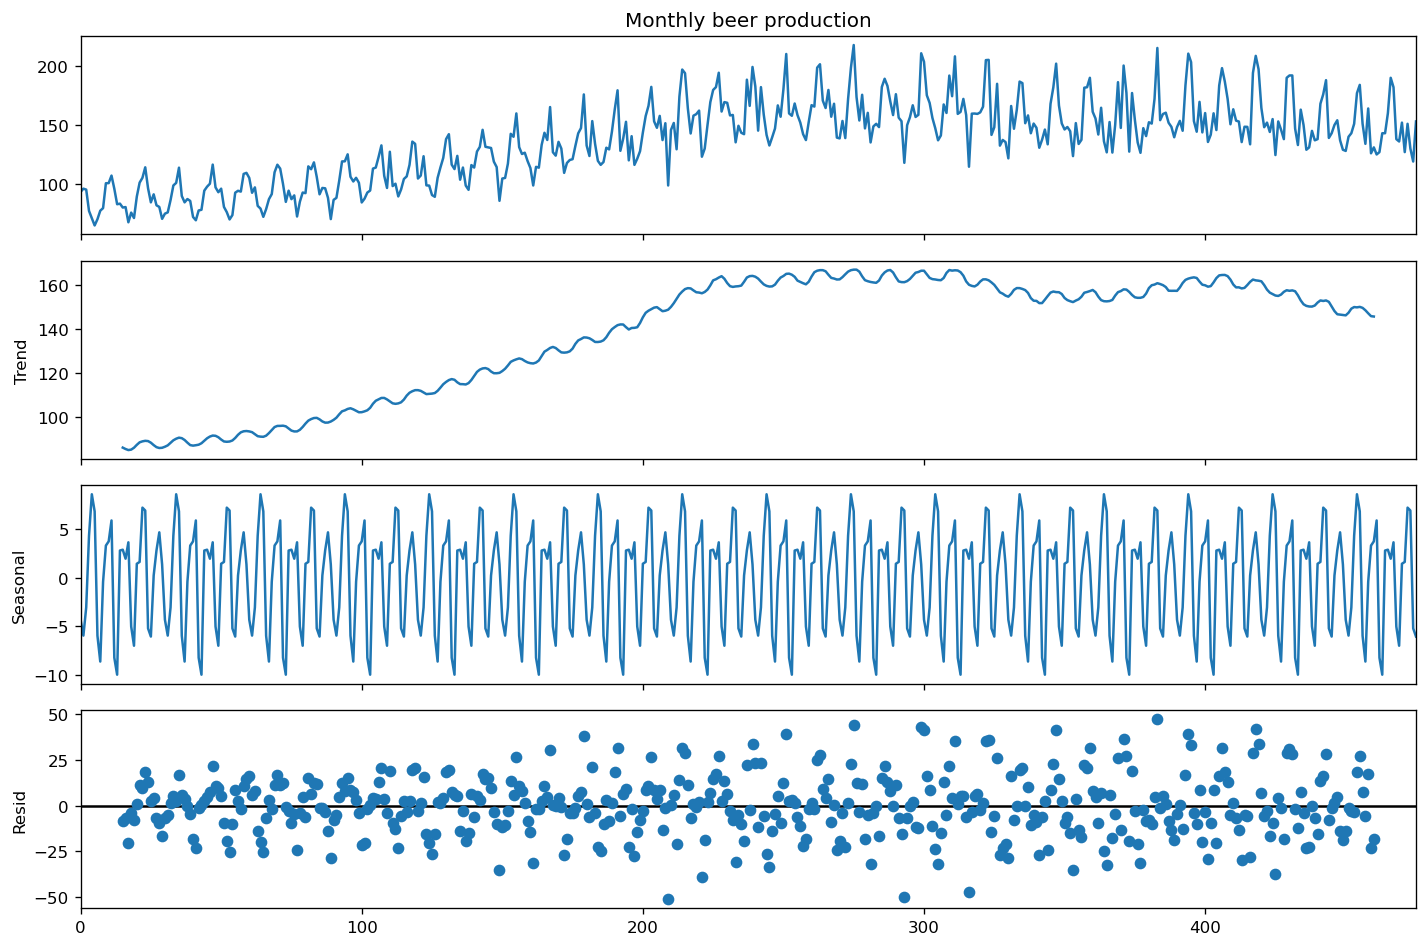

In [71]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize']=12,8
a = seasonal_decompose(df["Monthly beer production"],model='additive',period=30)
a.plot();

In [72]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [74]:
arima_model = SARIMAX(train_data['Monthly beer production'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

C:\Users\16079220\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                    Monthly beer production   No. Observations:                  464
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood               -1707.981
Date:                                    Wed, 14 Aug 2024   AIC                           3437.963
Time:                                            11:15:46   BIC                           3483.478
Sample:                                                 0   HQIC                          3455.881
                                                    - 464                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1244      0.042     -2.971      0.003      -0.207      -0.042
ar.L2         -0.1714      0.046     -3.718      0.000      -0.262      -0.081
ma.L1         -0.8411      0.028    -29.828      0.000      -0.896      -0.786
ar.S.L12       1.7559      0.113     15.594      0.000       1.535       1.977
ar.S.L24      -1.6107      0.211     -7.619      0.000      -2.025      -1.196
ar.S.L36       0.7897      0.166      4.759      0.000       0.464       1.115
ar.S.L48       0.0638      0.062      1.026      0.305      -0.058       0.186
ma.S.L12      -1.5542      0.123    -12.615      0.000      -1.796      -1.313
ma.S.L24       1.3859      0.199      6.979      0.000       0.997       1.775
ma.S.L36      -0.6561      0.115     -5.700      0.000      -0.882      -0.431
sigma2        83.9518      4.824     17.402      0.000      74.497      93.407
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                40.71
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               4.07   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

C:\Users\16079220\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


464    133.912387
465    157.808788
466    181.899673
467    183.483563
468    144.979951
469    136.854025
470    151.131120
471    133.128395
472    137.931413
473    120.514764
474    128.461894
475    138.795520
Name: ARIMA Predictions, dtype: float64

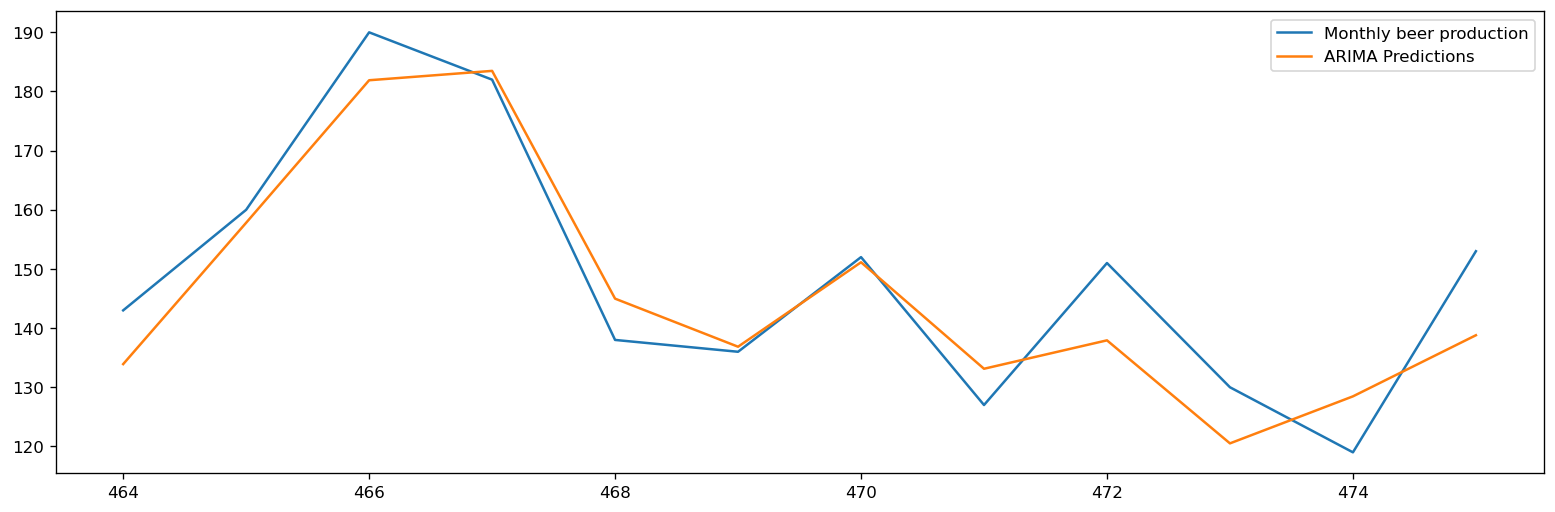

In [76]:
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [77]:
from statsmodels.tools.eval_measures import rmse

In [78]:


arima_rmse_error = rmse(test_data['Monthly beer production'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')



MSE Error: 66.25133330148236
RMSE Error: 8.13949220169676
Mean: 136.3953781512605


In [79]:


arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred



C:\Users\16079220\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


464    133.912387
465    157.808788
466    181.899673
467    183.483563
468    144.979951
469    136.854025
470    151.131120
471    133.128395
472    137.931413
473    120.514764
474    128.461894
475    138.795520
Name: ARIMA Predictions, dtype: float64

In [80]:
test_data['ARIMA_Predictions'] = arima_pred

C:\Users\16079220\AppData\Local\Temp\ipykernel_18764\3839166069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['ARIMA_Predictions'] = arima_pred


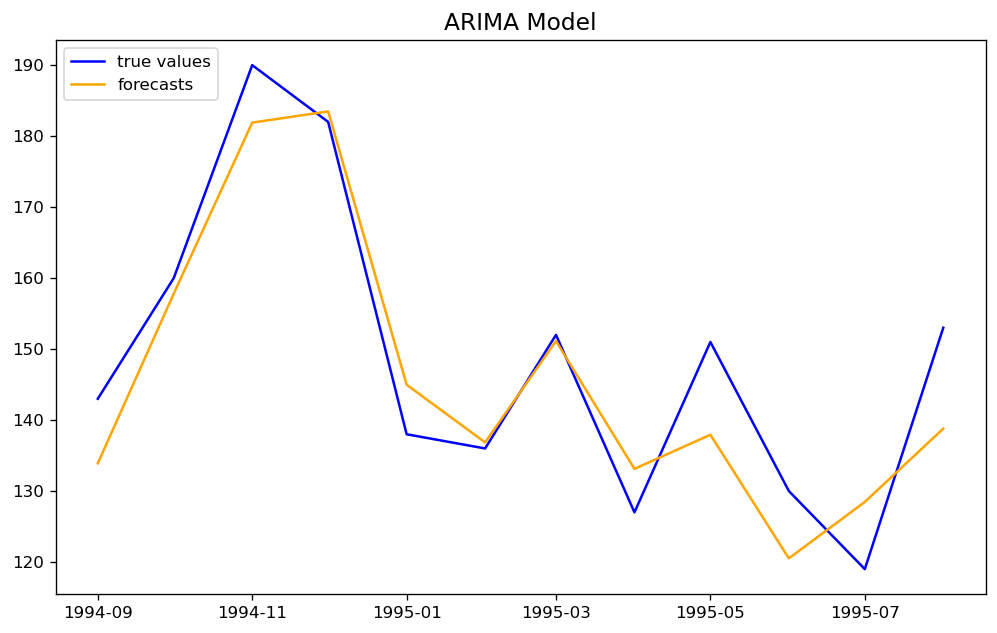

In [81]:


plt.figure(figsize = (10,6))
plt.plot(test_data["Month"],test_data["Monthly beer production"], label = "true values", color = "blue")
plt.plot(test_data["Month"],test_data["ARIMA_Predictions"],label = "forecasts", color='orange')
plt.title("ARIMA Model", size = 14)
plt.legend(loc = 'upper left')
plt.show()



## 1. Dataset para ejercicio 

https://www.kaggle.com/datasets/chirag19/air-passengers


Este conjunto de datos proporciona los totales mensuales de pasajeros de una aerolínea estadounidense desde 1949 hasta 1960. Este conjunto de datos se extrae de un conjunto de datos integrado de R llamado AirPassengers.

In [15]:
import numpy as np 
import pandas as pd #
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization


In [18]:
path = 'AirPassengers.csv'
df = pd.read_csv(path)
df.columns = ['Date','Number of Passengers']

df.head()



,Date,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


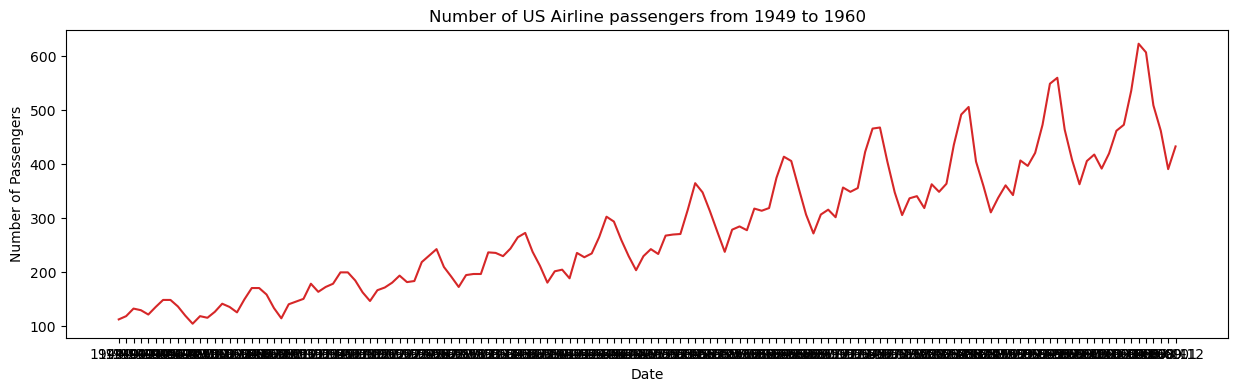

In [20]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Number of US Airline passengers from 1949 to 1960')

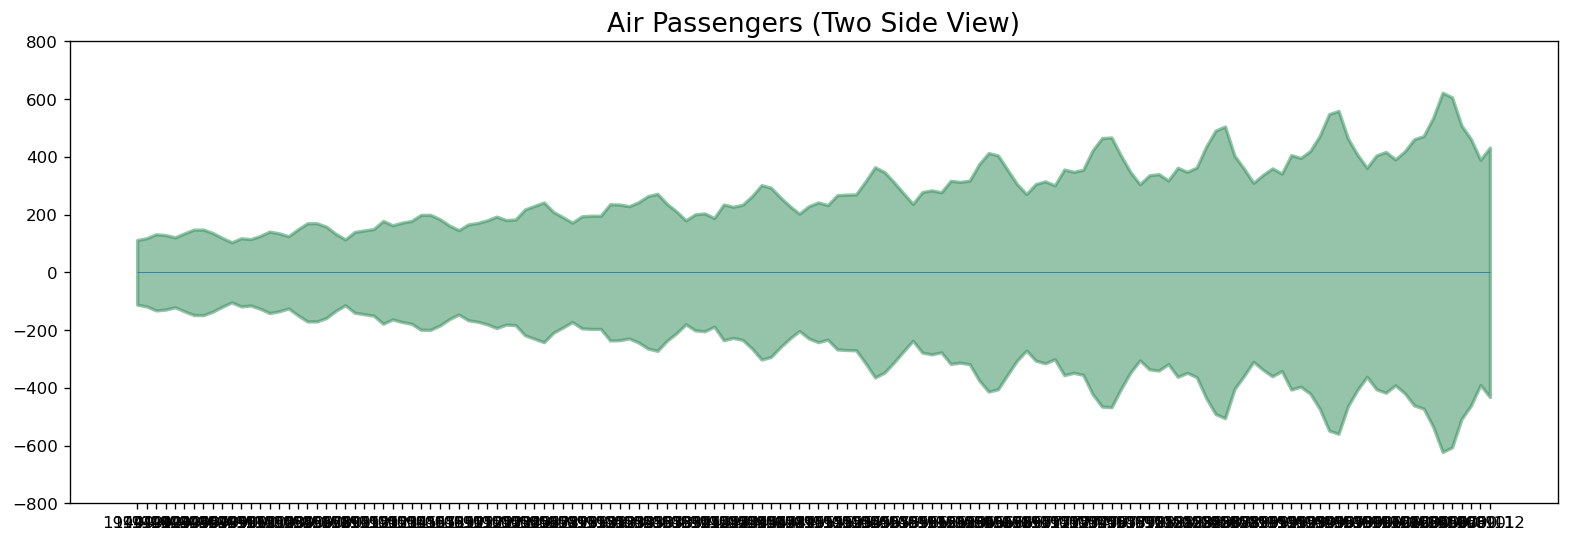

In [21]:
x = df['Date'].values
y1 = df['Number of Passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()

C:\Users\16079220\AppData\Local\Temp\ipykernel_33432\4037360255.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\16079220\AppData\Local\Temp\ipykernel_33432\4037360255.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


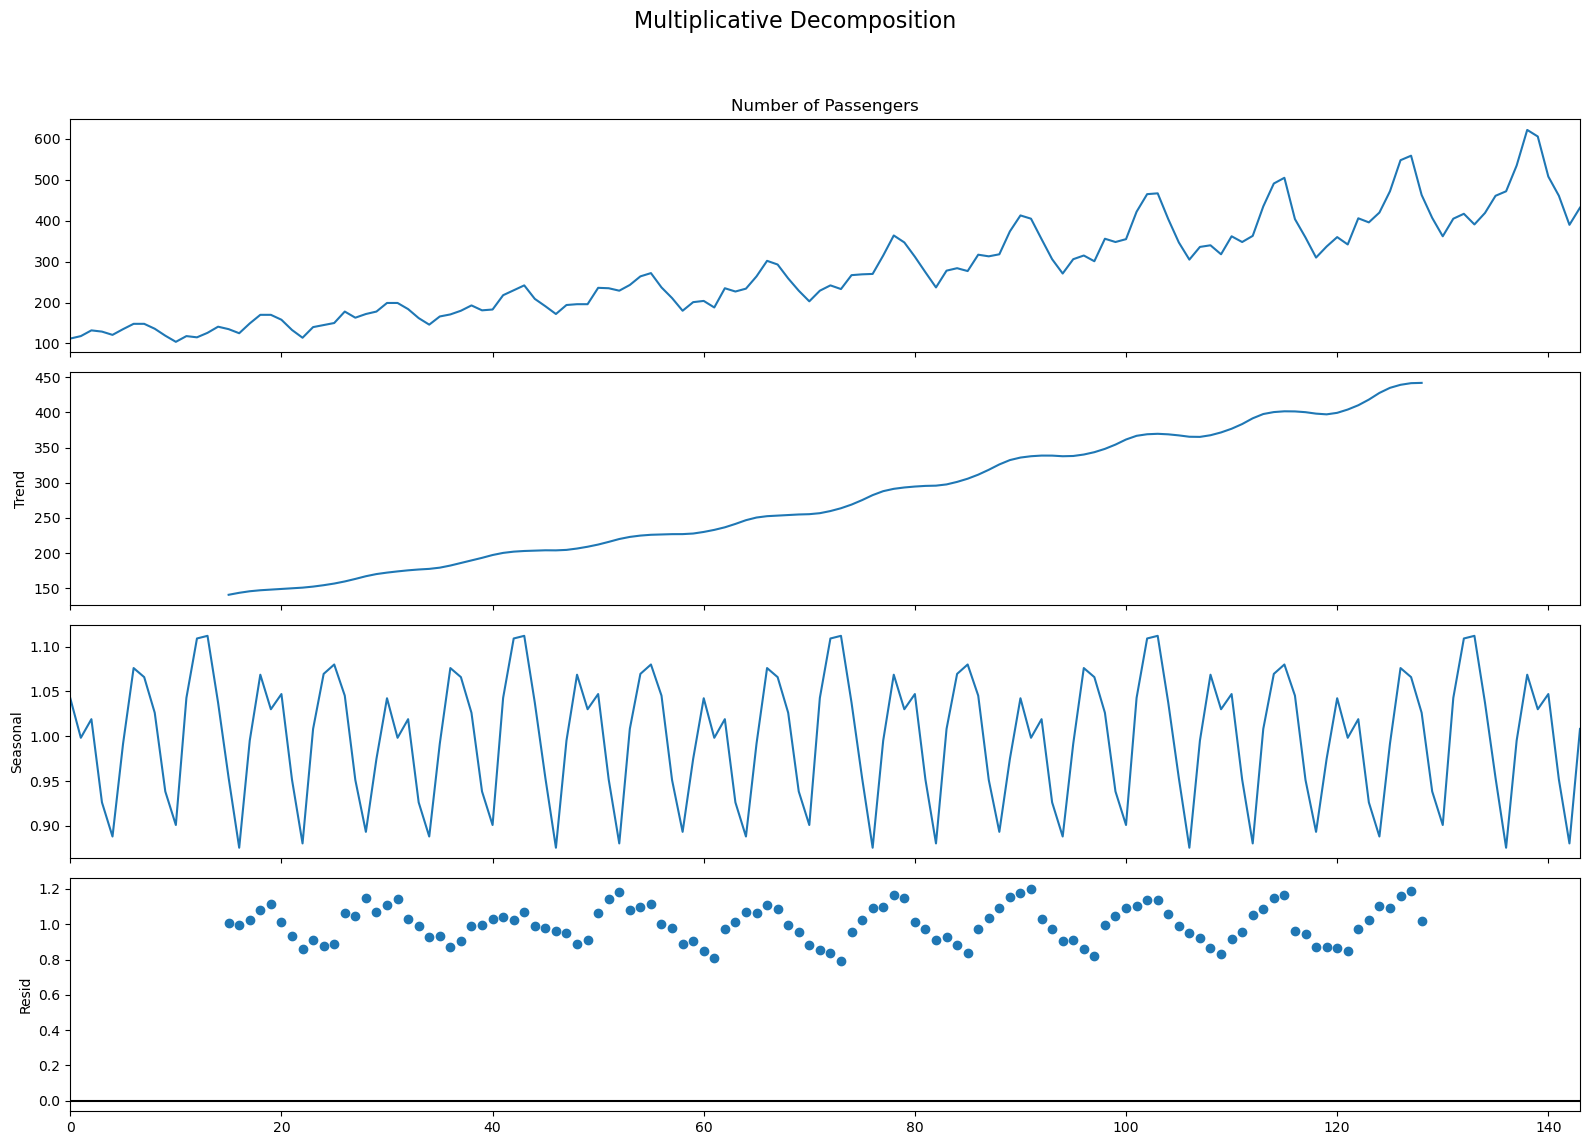

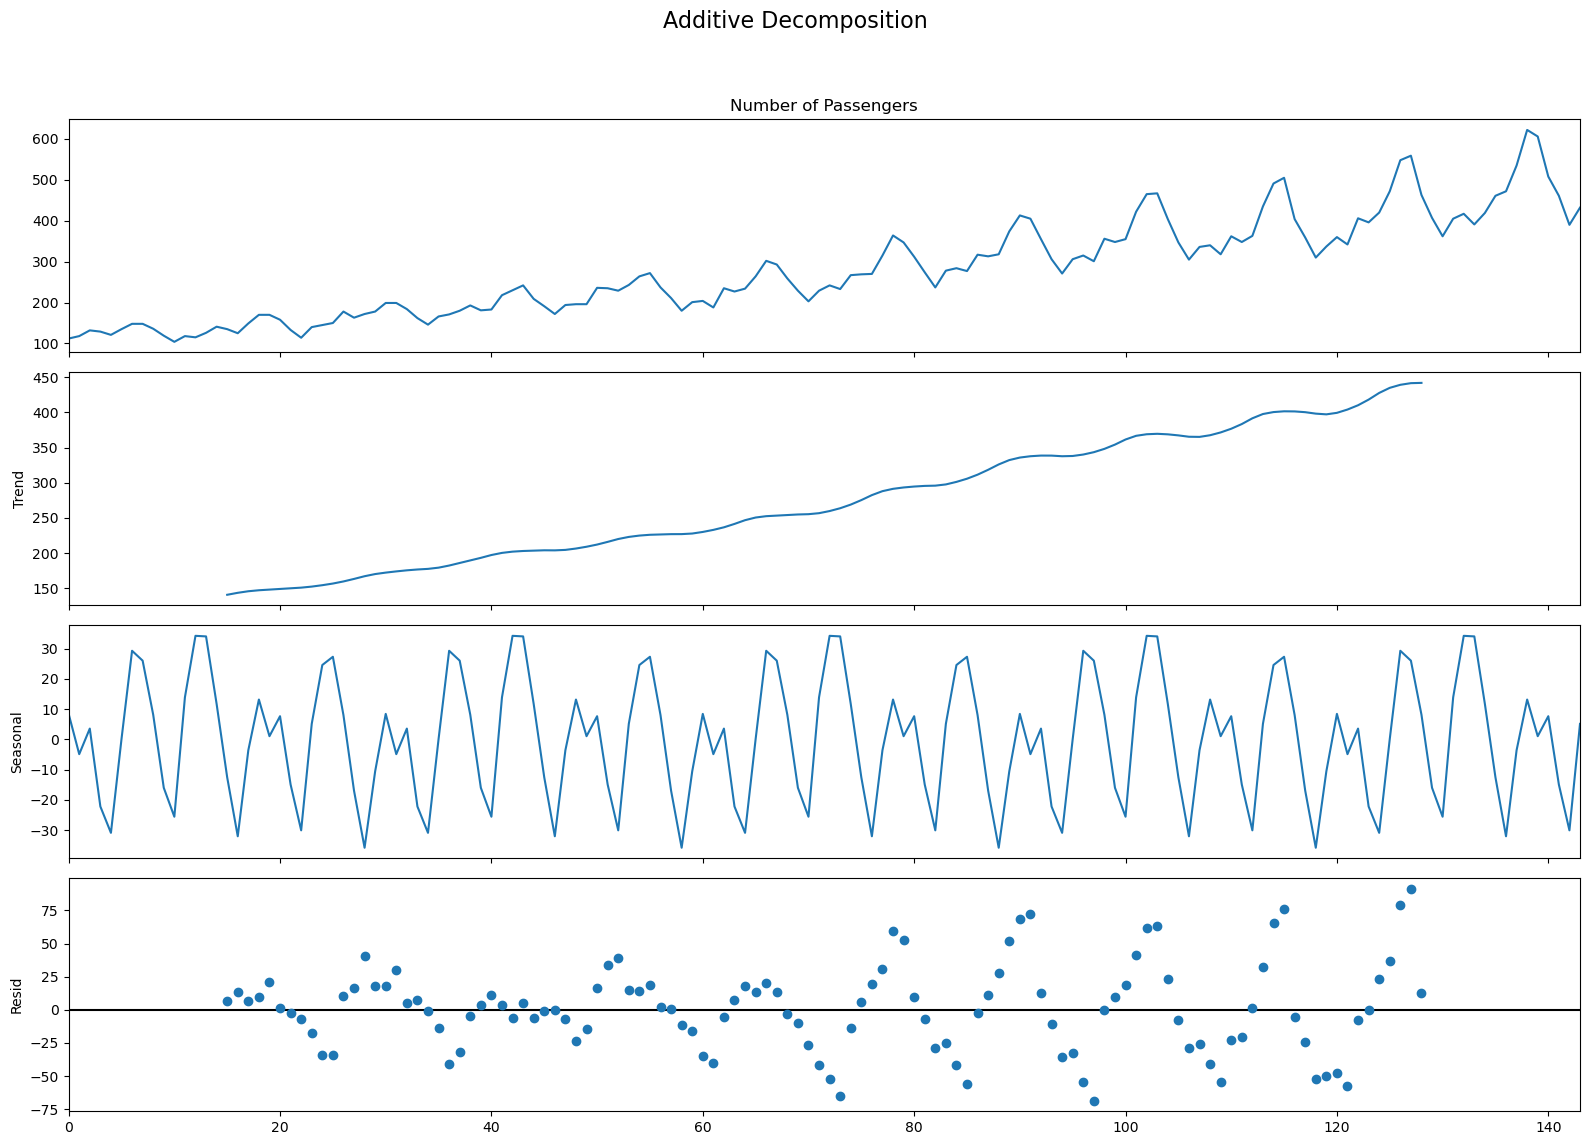

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Number of Passengers'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()